# MSDS696 Practicum 2 
## Fall 8W2 2020

### Exploration of Colorado County-Level Voting Patterns 2010 - 2020

#### James D. Reed (jreed011@regis.edu)

<img src="../img/Mountains2.jpg" width="700" height="200" />

## Model County Voter Behavior and Demographics


In [1]:
import requests
import pandas as pd
import geopandas as gpd
import censusdata
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import censusFunctions as cf
import abstractFunctions as af
from tabulate import tabulate
import censusFunctions as cf
import pickle
import os
%matplotlib inline

In [2]:
from notebook import notebookapp
host_detail = list(notebookapp.list_running_servers())
host_name = host_detail[0]['hostname']
print(f'Host name: {host_name}')
print(f'Current working directoy: {os.getcwd()}')

Host name: woolsey
Current working directoy: /home/jdreed/MSDS696/notebooks


In [3]:
counties = ['Adams',  'Alamosa',  'Arapahoe',  'Archuleta',  'Baca',  'Bent', 'Boulder', 
            'Chaffee', 'Cheyenne', 'Clear Creek', 'Conejos', 'Costilla', 
            'Crowley', 'Custer', 'Delta', 'Denver', 'Dolores', 'Douglas', 'Eagle', 'Elbert', 
            'El Paso', 'Fremont', 'Garfield', 'Gilpin', 'Grand', 'Gunnison', 'Hinsdale', 
            'Huerfano', 'Jackson', 'Jefferson', 'Kiowa', 'Kit Carson', 'La Plata', 'Lake', 
            'Larimer', 'Las Animas', 'Lincoln', 'Logan', 'Mesa', 'Mineral', 'Moffat', 
            'Montezuma', 'Montrose', 'Morgan', 'Otero', 'Ouray', 'Park', 'Phillips', 
            'Pitkin', 'Prowers', 'Pueblo', 'Rio Blanco', 'Rio Grande', 'Routt', 'Saguache', 
            'San Juan', 'San Miguel', 'Sedgwick', 'Summit', 'Teller', 'Washington', 
            'Weld', 'Yuma'] 

county_fips = {"Adams": "001",          "Alamosa": "003",        "Arapahoe":  "005",      "Archuleta": "007",      "Baca": "009", 
               "Bent": "011",          "Boulder": "013",         "Chaffee": "015",           "Cheyenne": "017",     "Clear Creek": "019", 
               "Conejos": "021",       "Costilla":  "023",          "Crowley":  "025",          "Custer": "027",          "Delta":  "029", 
               "Denver": "031",        "Dolores": "033",          "Douglas": "035",           "Eagle": "037",           "Elbert": "039", 
               "El Paso": "041",       "Fremont": "043",         "Garfield": "045",            "Gilpin":  "047",         "Grand": "049", 
               "Gunnison": "051",      "Hinsdale": "053",         "Huerfano": "055",         "Jackson": "057",       "Jefferson":  "059", 
               "Kiowa": "061",         "Kit Carson": "063",      "La Plata": "067",            "Lake": "065",            "Larimer":  "069", 
               "Las Animas": "071",    "Lincoln": "073",           "Logan": "075",              "Mesa": "077",           "Mineral": "079", 
               "Moffat": "081",        "Montezuma":  "083",  "Montrose": "085",        "Morgan": "087",       "Otero": "089", 
               "Ouray": "091",         "Park": "093",                "Phillips": "095",            "Pitkin":   "097",          "Prowers": "099", 
               "Pueblo": "101",        "Rio Blanco": "103",      "Rio Grande": "105",     "Routt": "107",            "Saguache":  "109", 
               "San Juan": "111",      "San Miguel": "113",     "Sedgwick": "115",        "Summit": "117",         "Teller": "119", 
               "Washington": "121",    "Weld": "123",               "Yuma": "125"} 

months = {'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,
          'July': 7,'August': 8, 'September': 9,'October': 10,'November': 11,'December': 12}

county_fips_fn = "../data/processed/fips_county.csv"
county_fips_df = pd.read_csv(county_fips_fn,usecols=[0,1], index_col = "fips")

state_fips_fn = "../data/processed/fips_states.csv"
state_fips_df = pd.read_csv(state_fips_fn,usecols=[0,1], index_col = "fips")

print(f'county_fips["Adams"] {county_fips["Adams"]}')


county_fips["Adams"] 001


---
## Load Census 2010 Population Data Frame

In [4]:
df_pop = cf.load_pickled_df('../data/processed/Census2010-population_df.p')
df_hou = cf.load_pickled_df('../data/processed/Census2010-housing_df.p')
df_gen = cf.load_pickled_df('../data/processed/Census2010-gender_df.p')

In [5]:
df_pop

,county,total_pop,total_urb_rur,urban,urban_ins_ars,urban_ins_cls,rural,total_race,white,black,american_indian,asian,nat_hawaiian,some_othr_race,two_or_more_races,hisp_latino,not_hisp_latino,total_hisp_latino,state_id,county_id
0,Costilla,3524,3524,0,0,0,3524,3524,2397,24,104,34,9,803,153,3524,1197,2327,8,23
1,Crowley,5823,5823,0,0,0,5823,5823,4509,559,139,59,0,456,101,5823,4137,1686,8,25
2,Custer,4255,4255,0,0,0,4255,4255,4055,44,30,16,0,39,71,4255,4055,200,8,27
3,Delta,30952,30952,11399,0,11399,19553,30952,27761,160,295,160,15,1862,699,30952,26607,4345,8,29
4,Denver,600158,600158,600158,600158,0,0,600158,413696,61435,8237,20433,607,71191,24559,600158,409193,190965,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Broomfield,55889,55889,55563,55563,0,326,55889,48099,587,336,3407,43,1848,1569,55889,49673,6216,8,14
60,Chaffee,17809,17809,11146,0,11146,6663,17809,16598,275,192,106,9,345,284,17809,16131,1678,8,15
61,Cheyenne,1836,1836,0,0,0,1836,1836,1711,7,13,11,1,75,18,1836,1658,178,8,17
62,Clear Creek,9088,9088,0,0,0,9088,9088,8664,56,72,51,3,86,156,9088,8659,429,8,19


In [6]:
df_pop.isna().sum()

county               0
total_pop            0
total_urb_rur        0
urban                0
urban_ins_ars        0
urban_ins_cls        0
rural                0
total_race           0
white                0
black                0
american_indian      0
asian                0
nat_hawaiian         0
some_othr_race       0
two_or_more_races    0
hisp_latino          0
not_hisp_latino      0
total_hisp_latino    0
state_id             0
county_id            0
dtype: int64

---
## Load County Abstract Data

In [7]:
df1952 = cf.load_pickled_df('../data/processed/abstracts/co_1952_majority.p')
df1956 = cf.load_pickled_df('../data/processed/abstracts/co_1956_majority.p')
df1960 = cf.load_pickled_df('../data/processed/abstracts/co_1960_majority.p')
df1964 = cf.load_pickled_df('../data/processed/abstracts/co_1964_majority.p')
df1968 = cf.load_pickled_df('../data/processed/abstracts/co_1968_majority.p')
df1972 = cf.load_pickled_df('../data/processed/abstracts/co_1972_majority.p')
df1972.drop(columns = ['No.'], inplace = True)
df1976 = cf.load_pickled_df('../data/processed/abstracts/co_1976_majority.p')
df1980 = cf.load_pickled_df('../data/processed/abstracts/co_1980_majority.p')
df2020 = cf.load_pickled_df('../data/processed/abstracts/co_2020_majority.p')
#df2020.drop(['Broomfield'], inplace = True)

cnty_fips = df2020['CNTY_FIPS']
edf = pd.DataFrame(columns = None, index = counties)

def merge_majority_rec(edfi, dfi, year):
    edf = edfi.copy(deep = True)
    df = dfi.copy(deep = True)
    sdf = gen_majority_records(df,year)
    edf = edf.merge(sdf, how = 'outer', left_index = True, right_index = True)
    return edf


def gen_majority_records(dfi,year):
    m_recs = []
    counties = []
    majority = []
    df = dfi.copy(deep = True)
    for j, row in df.iterrows():
        cnty = row[0]
        counties.append(cnty)
        m = row[-2]
        if m == 'Republican':
            maj = 1
        else:
            maj = 0
        majority.append(maj)
    a_dict = {k:v for k,v in zip(counties,majority)}
    #print(f"Boulder majority: {a_dict['Boulder']}")
    series = pd.Series(a_dict,index = df['County'], name = 'M' + str(year))
    return series


edf = merge_majority_rec(edf,df1952, 1952)
edf = merge_majority_rec(edf,df1956, 1956)
edf = merge_majority_rec(edf,df1960, 1960)
edf = merge_majority_rec(edf,df1964, 1964)
edf = merge_majority_rec(edf,df1968, 1968)
edf = merge_majority_rec(edf,df1972, 1972)
edf = merge_majority_rec(edf,df1976, 1976)
edf = merge_majority_rec(edf,df1980, 1980)
edf = merge_majority_rec(edf,df2020, 2020)

### Merge Census data with Election Data

In [8]:
df_pop

,county,total_pop,total_urb_rur,urban,urban_ins_ars,urban_ins_cls,rural,total_race,white,black,american_indian,asian,nat_hawaiian,some_othr_race,two_or_more_races,hisp_latino,not_hisp_latino,total_hisp_latino,state_id,county_id
0,Costilla,3524,3524,0,0,0,3524,3524,2397,24,104,34,9,803,153,3524,1197,2327,8,23
1,Crowley,5823,5823,0,0,0,5823,5823,4509,559,139,59,0,456,101,5823,4137,1686,8,25
2,Custer,4255,4255,0,0,0,4255,4255,4055,44,30,16,0,39,71,4255,4055,200,8,27
3,Delta,30952,30952,11399,0,11399,19553,30952,27761,160,295,160,15,1862,699,30952,26607,4345,8,29
4,Denver,600158,600158,600158,600158,0,0,600158,413696,61435,8237,20433,607,71191,24559,600158,409193,190965,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Broomfield,55889,55889,55563,55563,0,326,55889,48099,587,336,3407,43,1848,1569,55889,49673,6216,8,14
60,Chaffee,17809,17809,11146,0,11146,6663,17809,16598,275,192,106,9,345,284,17809,16131,1678,8,15
61,Cheyenne,1836,1836,0,0,0,1836,1836,1711,7,13,11,1,75,18,1836,1658,178,8,17
62,Clear Creek,9088,9088,0,0,0,9088,9088,8664,56,72,51,3,86,156,9088,8659,429,8,19


### Merge Election Performance (Democrat/Republican) by Party

In [9]:
def merge_censusdf(cdfi, dfi):
    edf = cdfi.copy(deep = True)
    df = dfi.copy(deep = True)
    edf = edf.merge(df, how = 'outer', left_index = True, right_index = True)
    return edf

df = df_pop.copy(deep = True)
df.set_index('county', inplace = True)
df

pop_edf_df = merge_censusdf(edf, df)
pop_edf_df

,M1952,M1956,M1960,M1964,M1968,M1972,M1976,M1980,M2020,total_pop,...,american_indian,asian,nat_hawaiian,some_othr_race,two_or_more_races,hisp_latino,not_hisp_latino,total_hisp_latino,state_id,county_id
Adams,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0,441603,...,5916,15931,591,64327,17504,441603,273725,167878,8,1
Alamosa,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,15445,...,433,148,19,2449,675,15445,8335,7110,8,3
Arapahoe,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,572003,...,4363,29077,1140,39049,24357,572003,466481,105522,8,5
Archuleta,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,12084,...,227,89,6,948,341,12084,9936,2148,8,7
Baca,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,3788,...,51,6,0,142,59,3788,3440,348,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Summit,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,27994,...,87,278,19,1842,435,27994,24005,3989,8,117
Teller,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,23350,...,212,165,21,256,578,23350,22056,1294,8,119
Washington,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,4814,...,7,11,3,102,73,4814,4407,407,8,121
Weld,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,252825,...,2817,3022,216,27271,7432,252825,181145,71680,8,123


### Save Model Data - Election Performance with Census 2010 Population Data Frame

In [10]:
ep_census2010_population = pop_edf_df.copy(deep = True)
cf.dump_pickled_df(ep_census2010_population, "../models/ep_census2010_population.b")

In [11]:
mask = ep_census2010_population.index == 'Broomfield'
ep_census2010_population.drop(labels = 'Broomfield', inplace = True)
pd.set_option('display.max_rows', ep_census2010_population.shape[0]+1)
ep_census2010_population

,M1952,M1956,M1960,M1964,M1968,M1972,M1976,M1980,M2020,total_pop,...,american_indian,asian,nat_hawaiian,some_othr_race,two_or_more_races,hisp_latino,not_hisp_latino,total_hisp_latino,state_id,county_id
Adams,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0,441603,...,5916,15931,591,64327,17504,441603,273725,167878,8,1
Alamosa,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,15445,...,433,148,19,2449,675,15445,8335,7110,8,3
Arapahoe,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,572003,...,4363,29077,1140,39049,24357,572003,466481,105522,8,5
Archuleta,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,12084,...,227,89,6,948,341,12084,9936,2148,8,7
Baca,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,3788,...,51,6,0,142,59,3788,3440,348,8,9
Bent,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1,6499,...,156,62,4,506,126,6499,4514,1985,8,11
Boulder,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,294567,...,1832,12133,173,13127,7881,294567,255291,39276,8,13
Chaffee,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,17809,...,192,106,9,345,284,17809,16131,1678,8,15
Cheyenne,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1,1836,...,13,11,1,75,18,1836,1658,178,8,17
Clear Creek,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0,9088,...,72,51,3,86,156,9088,8659,429,8,19


---
# Viualization

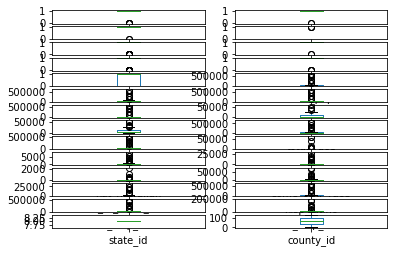

In [12]:
# box and whisker plots
data = ep_census2010_population.copy(deep = True)
data.plot(kind='box', subplots=True, layout=(14,2), sharex=False, sharey=False)
plt.show()

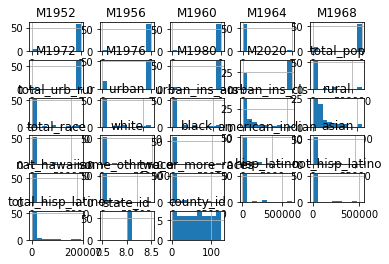

In [13]:
# histograms
data.hist()
plt.show()


---
## Model Preparation


### Pipeline Definition

In [14]:
'''
Credit: Jason Brownlee author of  Machine Learning with Python, 
    Chapter 14 Data Preparation and Modeling Pipeline
    p. 88
'''
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn
print(f'sklearn Version {sklearn.__version__}')

sklearn Version 0.23.2


In [15]:
def gen_colo_choropleth_clstrs(dfi, title, var, palette = 'RdBu'):
    '''
    gen_colo_choropleth_clstrs:  Uses baseline geometry of Colorado county map combined with data frame containing county 
            data values and generates a choropleth figure that should plot directly into the Jupyter notebook.  
            Additionally, the figure is saved as a png file in the img directory.
            
    colorscale – Sets the colorscale. The colorscale must be an array containing arrays mapping a normalized value to an 
    rgb, rgba, hex, hsl, hsv, or named color string. At minimum, a mapping for the lowest (0) and highest (1) values are 
    required. For example, [[0, 'rgb(0,0,255)'], [1, 'rgb(255,0,0)']]. To control the bounds of the colorscale in color space, use`zmin` and zmax. 
    
    Alternatively, colorscale may be a palette name string of the following list: 
    'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
    'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
    'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
    'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 
    'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
    'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 
    'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
    'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 
    'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 
    'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
    'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
    'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 
    'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 
    'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 
    'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r',
    'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 
    'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 
    'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
    
    '''
    # This is the baseline map for all of our choropleth maps - Colorado counties.
    fp =  '../data/shape/Colorado_County_Boundaries.shp'

    map_df = gpd.read_file(fp)
    
    # change the data types of the key index fields to integer so that it matches our census data index
    map_df = map_df.astype({"CNTY_FIPS": int, "US_FIPS": int})

    # Load the data dataframe 
    data_df = dfi.copy(deep = True)
   
    # Fix up Data 
    data_df = data_df.astype({"county_id": int, "state_id": int})
    data_df = data_df.rename(columns={"state_id": "STATEFP", "county_id": "CNTY_FIPS"})
    
    # join the geodataframe with the cleaned up census dataframe
    merged = map_df.set_index(['CNTY_FIPS']).join(data_df.set_index(['CNTY_FIPS']))
    
    # set a variable that will call whatever column we want to visualise on the map
    variable = var 

    # set the range for the choropleth
    vmin = min(pd.to_numeric(data_df[var]))
    vmax = max(pd.to_numeric(data_df[var]))

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 6))

    # create map
    merged.plot(column=variable, cmap=palette, linewidth=0.8, ax=ax, edgecolor='0.8')

    # remove the axis
    ax.axis('off')

    # add a title
    ax.set_title(title, fontdict={'fontsize': '14', 'fontweight' : '3'})

    # data source annotation
    ax.annotate(f'Source: Census.gov & CDPHE Open Data, (color palette: {palette})',xy=(0.1, .08),  
                xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', 
                fontsize=9, color='#555555')

    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap= palette, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # empty array for the data range
    sm._A = []
    
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)

    fn = "../img/" + "co_unsupervised_cluster" + '_' + var + '_' + palette + '.png'
    fig.savefig(fn, dpi=600)
    #plt.close()
    return


## Affinity Propogation

### Based on Jason Brownlee's Clustering Algorithms with Python

URL: https://machinelearningmastery.com/clustering-algorithms-with-python/

In [25]:
results = []
filename =  "../models/ep_census2010_population.b"
def get_dataset(filename, drop_columns = ['state_id', 'county_id']):
    # Unpickle
    df = cf.load_pickled_df(filename)
    df.drop(labels = drop_columns, axis = "columns", inplace = True)
    df.drop(labels = 'Broomfield', inplace = True)
    return(df)


def plot_clustersxxx(df, yhat, clusters, yl_index, yl_title, xl_index, xl_title, title):
    
    sns.set_style("whitegrid")
    sns.set_palette("GnBu")
    sns.set_context("notebook")
    pd_recs = []
    plt_data = pd.DataFrame(columns = ['County', 'Cluster', 'VarX', 'VarY'])
    j = 0
    for i, rec in df.iterrows():
        county = i
        cluster = yhat[j]
        varX = rec.iloc[xl_index]
        varY = rec.iloc[yl_index]
        pd_rec = {"County": county, 'Cluster': cluster, 'VarX': varX,'VarY': varY}
        pd_recs.append(pd_rec)
        j += 1
    plt_data = pd.DataFrame.from_dict(pd_recs)
    
    g = sns.relplot(x = 'VarX', y = 'VarY', ,data = plt_data, hue = "Cluster")
    g.set(xscale='log', yscale='log')
    g.fig.suptitle(title, y = 1.05)
    g.set(xlabel = xl_title, ylabel = yl_title)
    fn = "../img/" + "co_unsupervised_cluster" + '_' +  title +'.png'
    g.savefig(fn, dpi=600)
    plt.show()
    return  # (plt_data)

def plot_clusters(df, yhat, clusters, yl_index, yl_title, xl_index, xl_title, title):
    
    sns.set_style("whitegrid")
    sns.set_palette("GnBu")
    sns.set_context("notebook")
    pd_recs = []
    plt_data = pd.DataFrame(columns = ['County', 'Cluster', 'VarX', 'VarY'])
    j = 0
    for i, rec in df.iterrows():
        county = i
        cluster = yhat[j]
        varX = rec.iloc[xl_index]
        varY = rec.iloc[yl_index]
        pd_rec = {"County": county, 'Cluster': cluster, 'VarX': varX,'VarY': varY}
        pd_recs.append(pd_rec)
        j += 1
    print(f'after loop value of j:{j}')
    plt_data = pd.DataFrame.from_dict(pd_recs)

    
    plt.figure(figsize=(20,5))
    fig, ax = plt.subplots()
    ax.scatter(plt_data['VarX'], plt_data['VarY'], c=plt_data['Cluster'], alpha=0.9)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel(xl_title, fontsize=15)
    ax.set_ylabel(yl_title, fontsize=15)
    ax.set_title(title)

    ax.grid(True)
    fig.tight_layout()

    plt.show()
    return(plt_data)

data.isnull().sum().sum() 0
[Pipeline] ....... (step 1 of 2) Processing standardize, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing lda, total=   0.0s
clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


/home/jdreed/miniconda3/envs/msds696_env/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


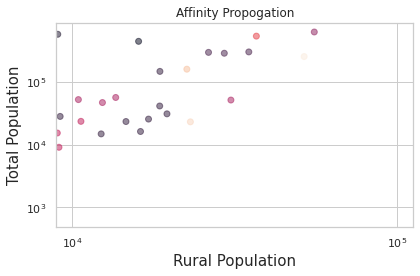

In [17]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ep_census2010_population = pop_edf_df.copy(deep = True)
cf.dump_pickled_df(ep_census2010_population, "../models/ep_census2010_population.b")

# load data
filename =  "../models/ep_census2010_population.b"
names    = ['M1952', 'M1956', 'M1960', 'M1964', 'M1968', 'M1972', 'M1976', 'M1980',
            'M2020', 'total_pop', 'total_urb_rur', 'urban', 'urban_ins_ars',
            'urban_ins_cls', 'rural', 'total_race', 'white', 'black',
            'american_indian', 'asian', 'nat_hawaiian', 'some_othr_race',
            'two_or_more_races', 'hisp_latino', 'not_hisp_latino',
            'total_hisp_latino', 'state_id', 'county_id']
data = get_dataset(filename, drop_columns = ['state_id', 'county_id'])

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', AffinityPropagation(damping=0.9)))

ap_pipe = Pipeline(estimators, verbose = True)
ap_pipe

# Check for nulls
print(f'data.isnull().sum().sum() {data.isnull().sum().sum()}')
X = data.values

random_state = None

# fit the model
ap_pipe.fit(X)

# assign a cluster to each example
yhat = ap_pipe.predict(X)

rec = pd.Series(data = yhat, index = counties, name = "Affinity")
results.append(rec)

# retrieve unique clusters
clusters = unique(yhat)
print(f'clusters: {clusters}')

df = plot_clusters(data, yhat, clusters, 9, "Total Population", 14, "Rural Population", "Affinity Propogation")
#df = plot_clusters_test(data, yhat, clusters, 9, "Total Population", 14, "Rural Population", "Affinity Propogation")


In [18]:
print(data.columns)
data.loc[:,'total_pop':'rural']

Index(['M1952', 'M1956', 'M1960', 'M1964', 'M1968', 'M1972', 'M1976', 'M1980',
       'M2020', 'total_pop', 'total_urb_rur', 'urban', 'urban_ins_ars',
       'urban_ins_cls', 'rural', 'total_race', 'white', 'black',
       'american_indian', 'asian', 'nat_hawaiian', 'some_othr_race',
       'two_or_more_races', 'hisp_latino', 'not_hisp_latino',
       'total_hisp_latino'],
      dtype='object')


,total_pop,total_urb_rur,urban,urban_ins_ars,urban_ins_cls,rural
Adams,441603,441603,425615,425615,0,15988
Alamosa,15445,15445,9751,0,9751,5694
Arapahoe,572003,572003,562992,562992,0,9011
Archuleta,12084,12084,4909,0,4909,7175
Baca,3788,3788,0,0,0,3788
Bent,6499,6499,4032,0,4032,2467
Boulder,294567,294567,268312,268312,0,26255
Chaffee,17809,17809,11146,0,11146,6663
Cheyenne,1836,1836,0,0,0,1836
Clear Creek,9088,9088,0,0,0,9088


## Agglomerative Clustering

data.isnull().sum().sum() 0
[Pipeline] ....... (step 1 of 2) Processing standardize, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing lda, total=   0.0s
yhat: [1 0 1 0 0 0 3 0 0 0 0 2 0 0 0 1 0 3 0 1 0 0 0 0 0 0 0 2 0 3 0 0 0 0 3 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 3 0]
clusters: [0 1 2 3 4]


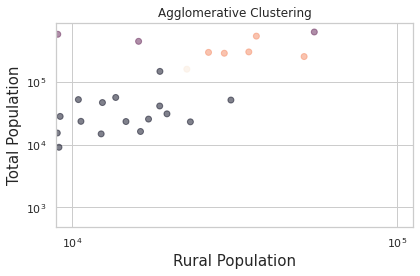

,County,Cluster,VarX,VarY
0,Adams,1,15988.0,441603.0
1,Alamosa,0,5694.0,15445.0
2,Arapahoe,1,9011.0,572003.0
3,Archuleta,0,7175.0,12084.0
4,Baca,0,3788.0,3788.0
5,Bent,0,2467.0,6499.0
6,Boulder,3,26255.0,294567.0
7,Chaffee,0,6663.0,17809.0
8,Cheyenne,0,1836.0,1836.0
9,Clear Creek,0,9088.0,9088.0


In [19]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
from sklearn.pipeline import Pipeline

# define dataset
data = get_dataset(filename, drop_columns = ['state_id', 'county_id'])

ag_pipe = Pipeline(estimators, verbose = True)
ag_pipe



# Check for nulls
print(f'data.isnull().sum().sum() {data.isnull().sum().sum()}')
X = data.values

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', AgglomerativeClustering(n_clusters = 5)))

ag_pipe = Pipeline(estimators, verbose = True)
ag_pipe


# fit model and predict clusters
yhat = ag_pipe.fit_predict(X)
print(f'yhat: {yhat}')


rec = pd.Series(data = yhat, index = counties, name = "Agglomerative")
results.append(rec)

# retrieve unique clusters
clusters = unique(yhat)
print(f'clusters: {clusters}')

plot_clusters(data, yhat, clusters,  9, "Total Population", 14, "Rural Population", "Agglomerative Clustering")

## BIRCH = Balanced Iterative and Dynamically Cluster

In [20]:
# BIRCH Clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
from sklearn.pipeline import Pipeline

# define dataset
data = get_dataset(filename, drop_columns = ['state_id', 'county_id'])

# check for nulls
print(f'data.isnull().sum().sum() {data.isnull().sum().sum()}')
X = data.values


# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', Birch(threshold=0.01, n_clusters=5)))

b_pipe = Pipeline(estimators, verbose = True)
b_pipe
# define the model

# fit model and predict clusters
yhat = b_pipe.fit_predict(X)
print(f'yhat: {yhat}')

rec = pd.Series(data = yhat, index = counties, name = 'BIRCH')
results.append(rec)


# retrieve unique clusters
clusters = unique(yhat)
print(f'clusters: {clusters}')

plot_clusters(data, yhat, clusters,  9, "Total Population", 14, "Rural Population", "Urban Population", "BIRCH")

data.isnull().sum().sum() 0
[Pipeline] ....... (step 1 of 2) Processing standardize, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing lda, total=   0.0s
yhat: [1 0 1 0 0 0 3 0 0 0 0 2 0 0 0 1 0 3 0 1 0 0 0 0 0 0 0 2 0 3 0 0 0 0 3 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 3 0]
clusters: [0 1 2 3 4]


TypeError: plot_clusters() takes 8 positional arguments but 9 were given

data.isnull().sum().sum() 0
[Pipeline] ....... (step 1 of 2) Processing standardize, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing lda, total=   0.0s
yhat: [-1  0 -1  0  0  1 -1 -1  1 -1 -1 -1  0  0 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1  1 -1  0  0 -1 -1 -1 -1  0 -1 -1 -1 -1  0]
clusters: [-1  0  1]
after loop value of j:63


<Figure size 1440x360 with 0 Axes>

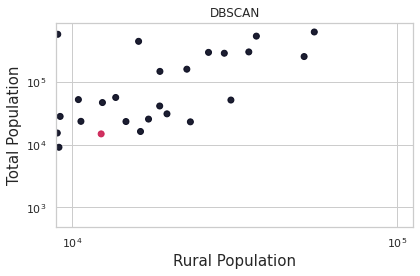

,County,Cluster,VarX,VarY
0,Adams,-1,15988.0,441603.0
1,Alamosa,0,5694.0,15445.0
2,Arapahoe,-1,9011.0,572003.0
3,Archuleta,0,7175.0,12084.0
4,Baca,0,3788.0,3788.0
5,Bent,1,2467.0,6499.0
6,Boulder,-1,26255.0,294567.0
7,Chaffee,-1,6663.0,17809.0
8,Cheyenne,1,1836.0,1836.0
9,Clear Creek,-1,9088.0,9088.0


In [26]:
# DBSCAN
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline

# define dataset
data = get_dataset(filename, drop_columns = ['state_id', 'county_id'])


# check for nulls
print(f'data.isnull().sum().sum() {data.isnull().sum().sum()}')
X = data.values

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', DBSCAN()))

db_pipe = Pipeline(estimators, verbose = True)
db_pipe
# define the model

# fit model and predict clusters
yhat = db_pipe.fit_predict(X)
print(f'yhat: {yhat}')

rec = pd.Series(data = yhat, index = counties, name = 'DBSCAN')
results.append(rec)

# retrieve unique clusters
clusters = unique(yhat)
print(f'clusters: {clusters}')

plot_clusters(data, yhat, clusters,  9, "Total Population", 14, "Rural Population", "DBSCAN")

## K-Means

In [ ]:
# KMeans
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# define dataset
data = get_dataset(filename, drop_columns = ['state_id', 'county_id'])


# check for nulls
print(f'data.isnull().sum().sum() {data.isnull().sum().sum()}')
X = data.values

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda',KMeans(n_clusters = 5)))

# define the model
km_pipe = Pipeline(estimators, verbose = True)
km_pipe

# fit model and predict clusters
yhat = km_pipe.fit_predict(X)
print(f'yhat: {yhat}')

rec = pd.Series(data = yhat, index = counties, name = 'K-Means')
results.append(rec)

# retrieve unique clusters
clusters = unique(yhat)
print(f'clusters: {clusters}')

plot_clusters(data, yhat, clusters,  9, "Total Population", 14, "Rural Population", "K-Means")

## Mean Shift

data.isnull().sum().sum() 0
[Pipeline] ....... (step 1 of 2) Processing standardize, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing lda, total=   0.1s
yhat: [ 9  0  5  0  0  0  1  0  0  0  0 14  0  0  0  8  0  1  0  3  2  0  0  0
  0  0  2 13  0  6  0  0  0 10  1 11  0  0  1  0  0  0  0  0  0  0  0  0
  7  0 12  0  0  0  0  0  0  0  0  0  2  4  0]
clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
after loop value of j:63


<Figure size 1440x360 with 0 Axes>

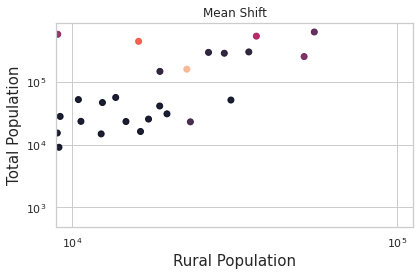

,County,Cluster,VarX,VarY
0,Adams,9,15988.0,441603.0
1,Alamosa,0,5694.0,15445.0
2,Arapahoe,5,9011.0,572003.0
3,Archuleta,0,7175.0,12084.0
4,Baca,0,3788.0,3788.0
5,Bent,0,2467.0,6499.0
6,Boulder,1,26255.0,294567.0
7,Chaffee,0,6663.0,17809.0
8,Cheyenne,0,1836.0,1836.0
9,Clear Creek,0,9088.0,9088.0


In [27]:
# Mean Shift
from numpy import unique
from numpy import where
from sklearn.cluster import MeanShift
from sklearn.pipeline import Pipeline

# define dataset
data = get_dataset(filename, drop_columns = ['state_id', 'county_id'])

# check for nulls
print(f'data.isnull().sum().sum() {data.isnull().sum().sum()}')
X = data.values

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda',MeanShift()))

# define the model
ms_pipe = Pipeline(estimators, verbose = True)
ms_pipe

# fit model and predict clusters
yhat = ms_pipe.fit_predict(X)
print(f'yhat: {yhat}')

rec =  pd.Series(data = yhat, index = counties, name = 'Mean-Shift')
results.append(rec)

# retrieve unique clusters
clusters = unique(yhat)
print(f'clusters: {clusters}')

plot_clusters(data, yhat, clusters, 9, "Total Population", 14, "Rural Population", "Mean Shift")

## OPTICS

>OPTICS clustering (where OPTICS is short for Ordering Points To Identify the Clustering Structure) is a modified version of DBSCAN described above.

>We introduce a new algorithm for the purpose of cluster analysis which does not produce a clustering of a data set explicitly; but instead creates an augmented ordering of the database representing its density-based clustering structure. This cluster-ordering contains information which is equivalent to the density-based clusterings corresponding to a broad range of parameter settings.


In [ ]:
from numpy import unique
from numpy import where
from sklearn.cluster import OPTICS
from sklearn.pipeline import Pipeline

# define dataset
data = get_dataset(filename, drop_columns = ['state_id', 'county_id'])

# check for nulls
print(f'data.isnull().sum().sum() {data.isnull().sum().sum()}')
X = data.values

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda',OPTICS()))

# define the model
o_pipe = Pipeline(estimators, verbose = True)
o_pipe

# fit model and predict clusters
yhat = o_pipe.fit_predict(X)
print(f'yhat: {yhat}')

rec = pd.Series(data = yhat, index = counties, name = 'OPTICS')
results.append(rec)

# retrieve unique clusters
clusters = unique(yhat)
print(f'clusters: {clusters}')

plot_clusters(data, yhat, clusters, 9, "Total Population", 14, "Rural Population", "OPTICS")

## Spectral Clustering

In [ ]:
from numpy import unique
from numpy import where
from sklearn.cluster import SpectralClustering
from sklearn.pipeline import Pipeline

# define dataset
data = get_dataset(filename, drop_columns = ['state_id', 'county_id'])


# check for nulls
#print(f'data.isnull().sum().sum() {data.isnull().sum().sum()}')
X = data.values

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda',SpectralClustering(n_clusters=5)))

# define the model
sc_pipe = Pipeline(estimators, verbose = True)
sc_pipe

# fit model and predict clusters
yhat = sc_pipe.fit_predict(X)
#print(f'yhat: {yhat}')

rec =  pd.Series(data = yhat, index = counties, name = 'Spectral')
results.append(rec)

# retrieve unique clusters
clusters = unique(yhat)
print(f'clusters: {clusters}')

plot_clusters(data, yhat, clusters,  14, "Rural Population", 9, "Total Population",  "Spectral")

## Gaussian Mixture Model

In [ ]:
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline

# define dataset
data = get_dataset(filename, drop_columns = ['state_id', 'county_id'])


# check for nulls
#print(f'data.isnull().sum().sum() {data.isnull().sum().sum()}')
X = data.values

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda',GaussianMixture(n_components=5)))

# define the model
gm_pipe = Pipeline(estimators, verbose = True)
gm_pipe

# fit model and predict clusters
yhat = gm_pipe.fit_predict(X)
#print(f'yhat: {yhat}')

rec = pd.Series(data = yhat, index = counties, name = 'Gaussian-Mixture')
#print(f'type(rec): {type(rec)}')
results.append(rec)

# retrieve unique clusters
clusters = unique(yhat)
print(f'clusters: {clusters}')

#plot_clusters(data, yhat, clusters, 14, "Rural Population", 9, "Total Population", "Gaussian Mixture Model")
plot_clusters_test(data, yhat, clusters, 14, "Rural Population", 9, "Total Population", "Gaussian Mixture Model")

## Choropleths of Cluster Algorithms
### Prepare the Data Source of the Clustering Data

In [ ]:
results_df = pd.DataFrame.from_dict(results)

df = results_df.copy(deep = True)
df = df.T
df['state_id'] = "08"
df['county_id'] = [county_fips[v] for v in df.index]
algo_list = ['Affinity','Agglomerative','BIRCH', 'DBSCAN', 'K-Means', 
             'Mean-Shift', 'OPTICS', 'Spectral', 'Gaussian-Mixture']
color_list = ['tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 
    'tab20c', 'tab20c_r', 'terrain', 'terrain_r' ]

alg = 'K-Means'
gen_colo_choropleth_clstrs(df, "Colorado State - Unsupervised Clustering: " + alg, alg, palette = 'tab20')

---
# Heirarchical Clustering